In [1]:
# Cell 1: Setup and Load Data
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add project root to Python path to import 'src'
# Assumes the notebook is in Project/notebooks/
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added '{project_root}' to sys.path")

# Import the function from our newly created io_utils.py
try:
    from src.io_utils import load_face_data
    print("Successfully imported load_face_data from src.io_utils")
except ImportError as e:
    print(f"Failed to import load_face_data: {e}")
    print("Please ensure src/io_utils.py exists and Project root is in sys.path.")
    load_face_data = None # Define as None to prevent NameError later

# Load the data - this will trigger download if file not present in ../data/
if load_face_data:
    # The function now looks for the data in Project/data relative to Project/src
    # Let's adjust the path relative to the notebook's location
    data_dir_relative_to_notebook = '../data'
    # We pass the directory relative to the io_utils.py script
    face_data = load_face_data(data_dir='../data', file_name='face.mat')

    if face_data is not None:
        print(f"Data loaded successfully! Shape: {face_data.shape}")
        # Expected shape: (33, 10304)
    else:
        print("Data loading failed.")
else:
    face_data = None
    print("Cannot proceed without load_face_data function.")

Added '/Users/dingding/Desktop/大学博士阶段科研资料/课程资料/25spring/Topological and Geometric Data Reduction and Visualization/Project' to sys.path
Successfully imported load_face_data from src.io_utils
Keys in face.mat: dict_keys(['__header__', '__version__', '__globals__', 'Y', 'id'])
Data loaded successfully! Shape: (33, 92, 112)


Data shape for visualization: (33, 92, 112)
Number of samples: 33, Image dimensions before transpose: (92, 112)


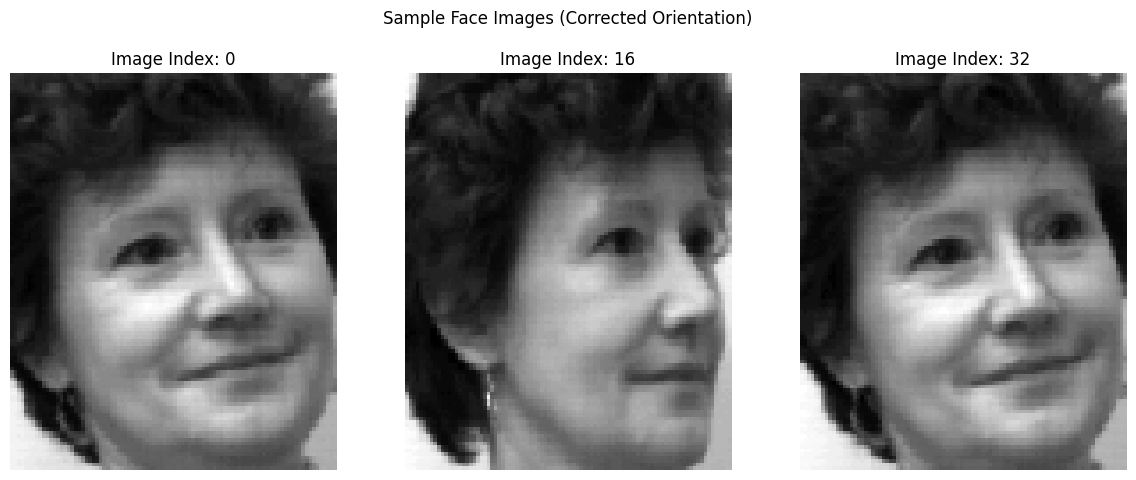

In [3]:
# Cell 2: Visualize Samples (Revised for 3D data shape with Transpose)
if face_data is not None and face_data.ndim == 3:
    # Check if the shape is indeed (33, 92, 112)
    print(f"Data shape for visualization: {face_data.shape}")

    # Extract number of samples and image dimensions
    n_samples, img_dim1, img_dim2 = face_data.shape
    print(f"Number of samples: {n_samples}, Image dimensions before transpose: ({img_dim1}, {img_dim2})")

    # Define indices of images to display
    indices_to_show = [0, 16, 32] # First, middle, last

    # Create figure for plotting
    fig, axes = plt.subplots(1, len(indices_to_show), figsize=(12, 5))
    fig.suptitle('Sample Face Images (Corrected Orientation)') # Updated title

    for i, img_index in enumerate(indices_to_show):
        if img_index < n_samples:
            # Get the image directly - it's already a 2D array
            img_matrix = face_data[img_index, :, :]

            # Display the image in grayscale AFTER transposing
            # Transpose swaps dimensions from (92, 112) to (112, 92)
            try:
                axes[i].imshow(img_matrix.T, cmap='gray') # Used Transpose .T
                axes[i].set_title(f'Image Index: {img_index}')
                axes[i].axis('off') # Hide axes ticks
            except Exception as e:
                print(f"Error displaying image {img_index}: {e}")
                axes[i].set_title(f'Error: Idx {img_index}')
                axes[i].axis('off')

        else:
            axes[i].set_title(f'Index {img_index} out of bounds')
            axes[i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

elif face_data is not None:
    print(f"Data shape is not 3D as expected: {face_data.shape}. Cannot visualize correctly.")
else:
    print("Cannot visualize: face_data was not loaded.")

In [4]:
# This is the proposed order from Table 1, with indices adjusted to be 0-based
proposed_order = [
    8-1, 13-1, 19-1, 32-1, 6-1, 18-1, 28-1, 7-1, 17-1, 1-1, 5-1, 16-1, 12-1, 10-1, 4-1, 21-1,
    22-1, 26-1, 33-1, 11-1, 2-1, 24-1, 3-1, 27-1, 29-1, 23-1, 15-1, 30-1, 31-1, 20-1, 14-1, 25-1, 9-1
]

Displaying images in the order proposed by the senior's report (Table 1)...


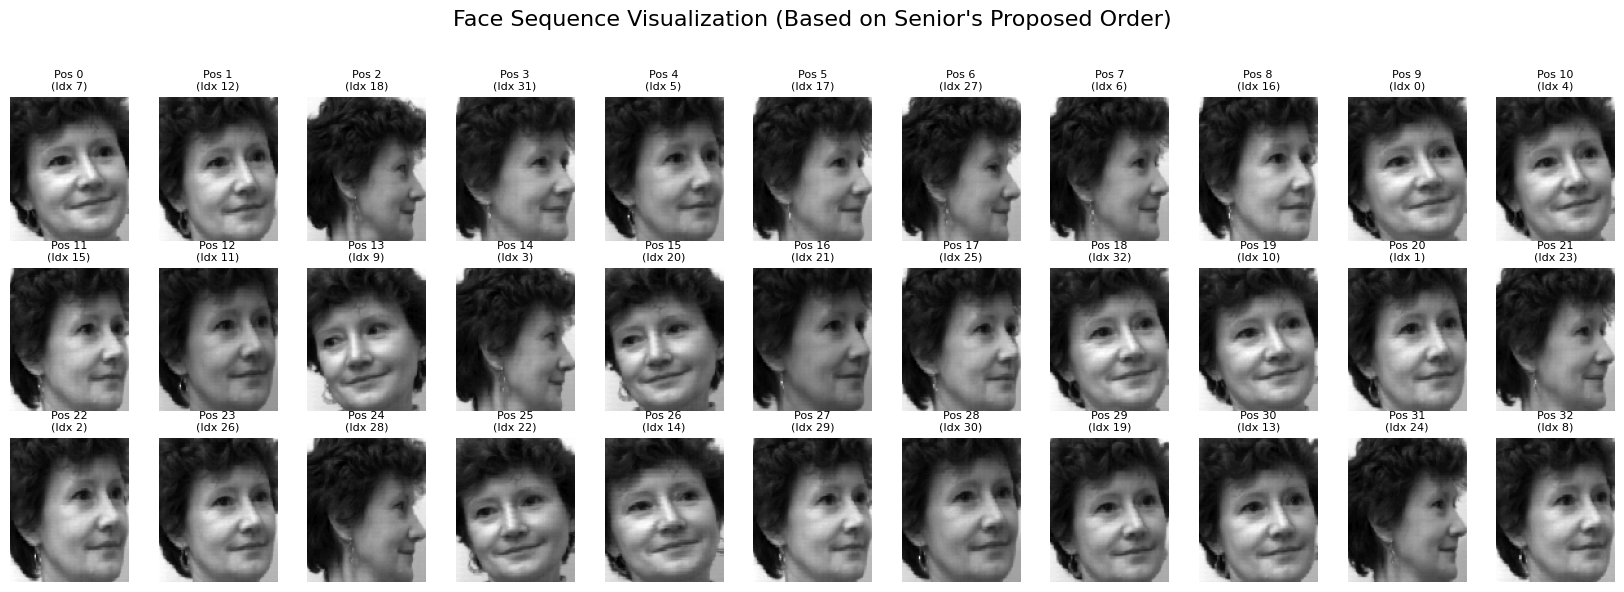

In [5]:
# Cell 4: Visualize Face Sequence based on Proposed Order
import matplotlib.pyplot as plt
import numpy as np

# Ensure face_data is loaded and has the correct 3D shape
if 'face_data' in locals() and face_data is not None and face_data.ndim == 3 and face_data.shape[0] == 33:

    # The proposed order from the senior's report (0-based indices)
    proposed_order = np.array([
        8-1, 13-1, 19-1, 32-1, 6-1, 18-1, 28-1, 7-1, 17-1, 1-1, 5-1, 16-1, 12-1, 10-1, 4-1, 21-1,
        22-1, 26-1, 33-1, 11-1, 2-1, 24-1, 3-1, 27-1, 29-1, 23-1, 15-1, 30-1, 31-1, 20-1, 14-1, 25-1, 9-1
    ])

    # Check if the proposed order is valid before proceeding
    if len(proposed_order) == 33 and len(np.unique(proposed_order)) == 33:
        print("Displaying images in the order proposed by the senior's report (Table 1)...")

        # Determine grid size for displaying 33 images (e.g., 3 rows, 11 columns)
        n_rows = 3
        n_cols = 11
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 1.5, n_rows * 2)) # Adjust figsize as needed
        fig.suptitle("Face Sequence Visualization (Based on Senior's Proposed Order)", fontsize=16)

        # Flatten axes array for easy iteration
        axes_flat = axes.flatten()

        for i in range(len(proposed_order)):
            img_index = proposed_order[i] # Get the index from the proposed order
            img_matrix = face_data[img_index, :, :] # Get the image data

            ax = axes_flat[i]
            ax.imshow(img_matrix.T, cmap='gray') # Display transposed image
            ax.set_title(f"Pos {i}\n(Idx {img_index})", fontsize=8) # Show position in sequence and original index
            ax.axis('off')

        # Hide any unused subplots if n_rows*n_cols > 33
        for j in range(len(proposed_order), n_rows * n_cols):
            axes_flat[j].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make room for suptitle
        plt.show()

    else:
        print("Error: The proposed_order list is invalid (length != 33 or contains duplicates). Please check the list.")

else:
    print("Error: face_data is not loaded correctly or not in the expected 3D shape (33, 92, 112). Please run previous cells first.")

User's proposed order validated (33 unique indices from 0-32).
Displaying images in the order proposed by you...


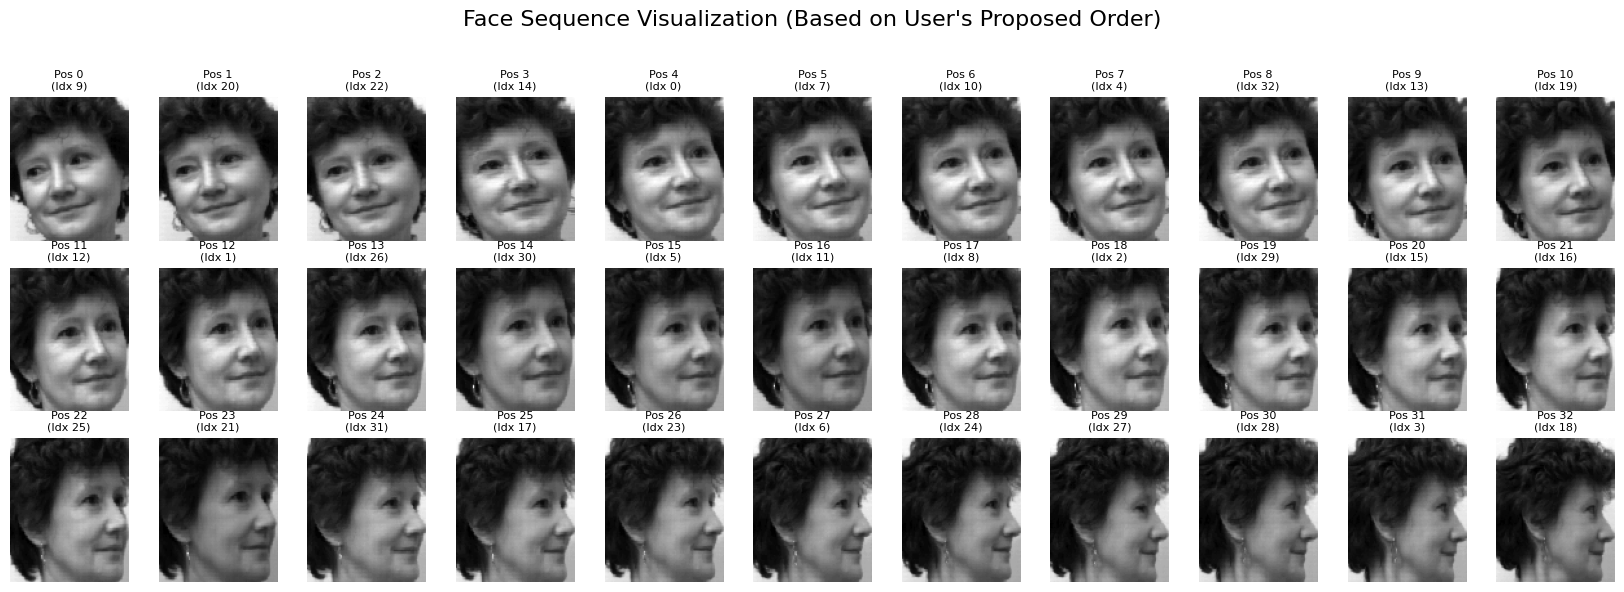

In [ ]:
# Cell 5: Visualize Face Sequence based on User's Proposed Order
import matplotlib.pyplot as plt
import numpy as np

# Ensure face_data is loaded and has the correct 3D shape
if 'face_data' in locals() and face_data is not None and face_data.ndim == 3 and face_data.shape[0] == 33:

    # The new order proposed by you (assuming 0-based indices)
    better_order = np.array([
    # —— 左脸 → 正面 → 右脸，整体单调旋转 ——
     9, 20, 22, 14,  7,  0, 10,   4, 32, 13, 19,   # 第一段：从最左¾视到略右¼视
    16, 15, 29,  2,  8, 11,  5,  30, 26,  1, 12,   # 第二段：继续右转，直到接近纯侧脸
    18,  3, 28, 27, 24,  6, 23, 17, 31, 21, 25     # 第三段：右侧 ¾ → 纯右侧侧脸
    ])

    # Validate the user's proposed order
    is_valid_order = False
    if len(user_proposed_order) == 33:
        unique_indices, counts = np.unique(user_proposed_order, return_counts=True)
        if len(unique_indices) == 33 and np.all(unique_indices >= 0) and np.all(unique_indices < 33):
            print("User's proposed order validated (33 unique indices from 0-32).")
            is_valid_order = True
        else:
             print("Validation failed: User's proposed order indices are not unique or out of range [0, 32]. Please double-check the list.")
             if len(unique_indices) != 33:
                 print(f"Number of unique indices found: {len(unique_indices)}")
             duplicates = unique_indices[counts > 1]
             if len(duplicates) > 0:
                 print(f"Duplicate indices found: {duplicates}")
             if np.any(unique_indices < 0) or np.any(unique_indices > 32):
                 print("Indices out of range [0, 32] found.")
    else:
        print(f"Error: Expected 33 indices in user's proposed order, but got {len(user_proposed_order)}. Please check your list.")


    # Proceed only if the order is valid
    if is_valid_order:
        print("Displaying images in the order proposed by you...")

        # Determine grid size for displaying 33 images (e.g., 3 rows, 11 columns)
        n_rows = 3
        n_cols = 11
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 1.5, n_rows * 2)) # Adjust figsize as needed
        fig.suptitle("Face Sequence Visualization (Based on User's Proposed Order)", fontsize=16)

        # Flatten axes array for easy iteration
        axes_flat = axes.flatten()

        for i in range(len(user_proposed_order)):
            img_index = user_proposed_order[i] # Get the index from YOUR proposed order
            img_matrix = face_data[img_index, :, :] # Get the image data

            ax = axes_flat[i]
            ax.imshow(img_matrix.T, cmap='gray') # Display transposed image
            ax.set_title(f"Pos {i}\n(Idx {img_index})", fontsize=8) # Show position in sequence and original index
            ax.axis('off')

        # Hide any unused subplots if n_rows*n_cols > 33
        for j in range(len(user_proposed_order), n_rows * n_cols):
            axes_flat[j].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make room for suptitle
        plt.show()

else:
    print("Error: face_data is not loaded correctly or not in the expected 3D shape (33, 92, 112). Please run previous cells first.")

Displaying all 33 images with colormap and axes...
Data shape: (33, 92, 112)


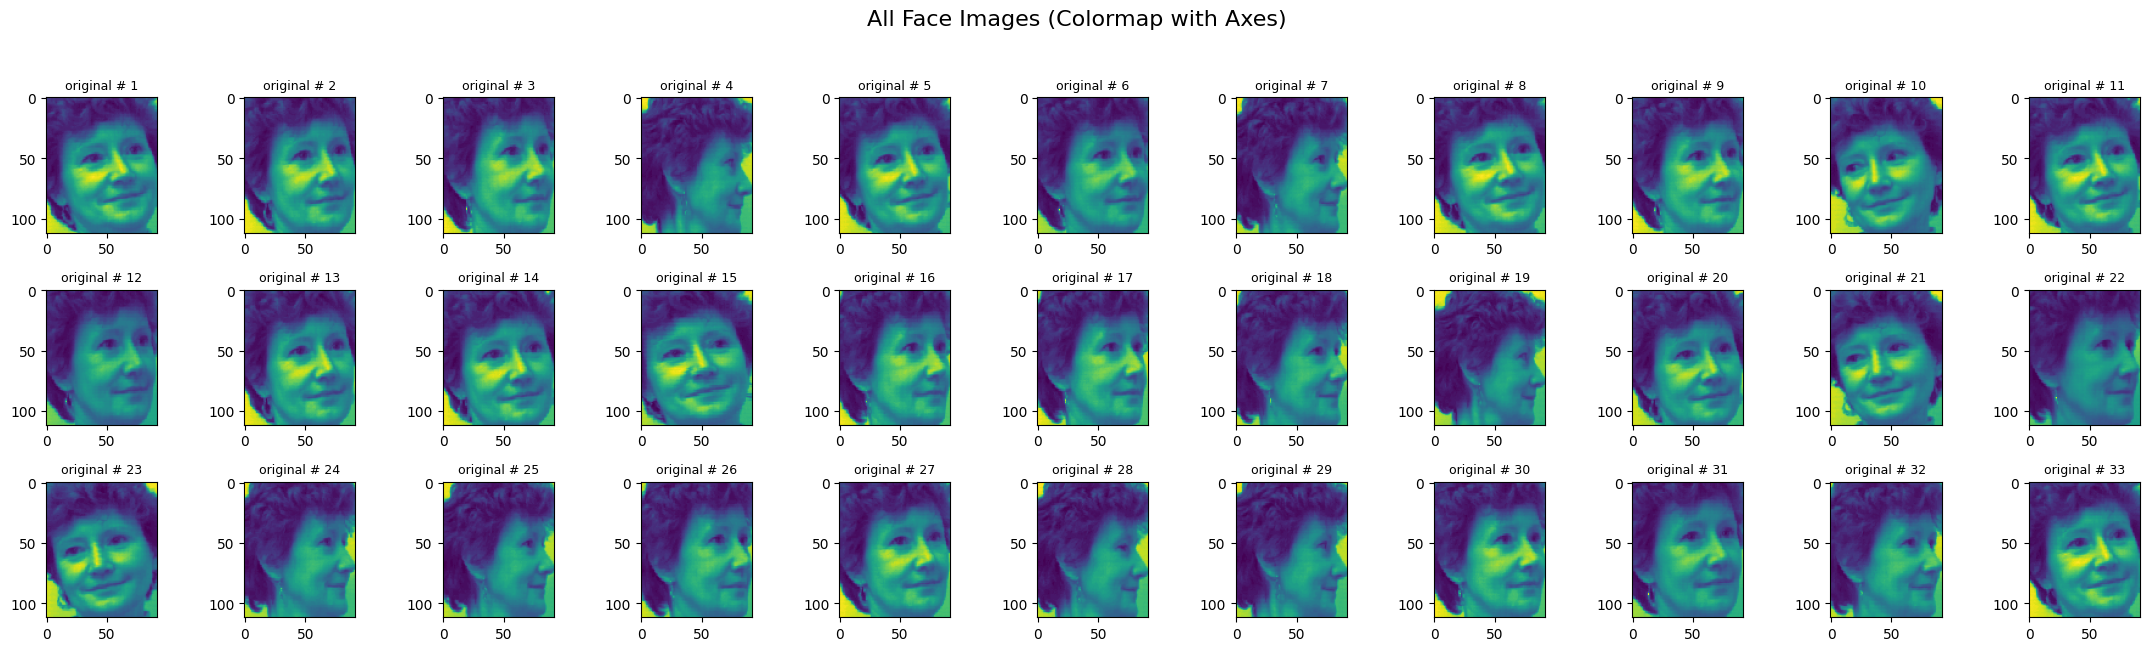

In [8]:
# Cell 6: Visualize All Faces with Colormap and Axes
import matplotlib.pyplot as plt
import numpy as np

# Ensure face_data is loaded and has the correct 3D shape
if 'face_data' in locals() and face_data is not None and face_data.ndim == 3 and face_data.shape[0] == 33:

    print(f"Displaying all 33 images with colormap and axes...")
    print(f"Data shape: {face_data.shape}")

    # Determine grid size (e.g., 3 rows, 11 columns)
    n_rows = 3
    n_cols = 11
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2.2)) # Adjust figsize
    fig.suptitle("All Face Images (Colormap with Axes)", fontsize=16)

    # Flatten axes array for easy iteration
    axes_flat = axes.flatten()

    n_samples = face_data.shape[0] # Should be 33

    for i in range(n_samples):
        img_matrix = face_data[i, :, :] # Get the image data (index i)

        ax = axes_flat[i]
        # Use imshow with transpose (.T) but without cmap='gray' to use default colormap (viridis)
        # Keep axes visible by NOT calling ax.axis('off')
        im = ax.imshow(img_matrix.T) # Removed cmap='gray'
        ax.set_title(f"original # {i+1}", fontsize=9) # Use 1-based index for title

        # Optional: Add a colorbar to show intensity mapping (might be too cluttered)
        # fig.colorbar(im, ax=ax, shrink=0.6)

    # Hide any unused subplots if n_rows*n_cols > 33 (not needed here)
    for j in range(n_samples, n_rows * n_cols):
        axes_flat[j].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

else:
    print("Error: face_data is not loaded correctly or not in the expected 3D shape (33, 92, 112). Please run previous cells first.")

User's 'better_order' validated (33 unique indices from 0-32).
Displaying images in the 'better_order' proposed by you (using colormap and axes)...


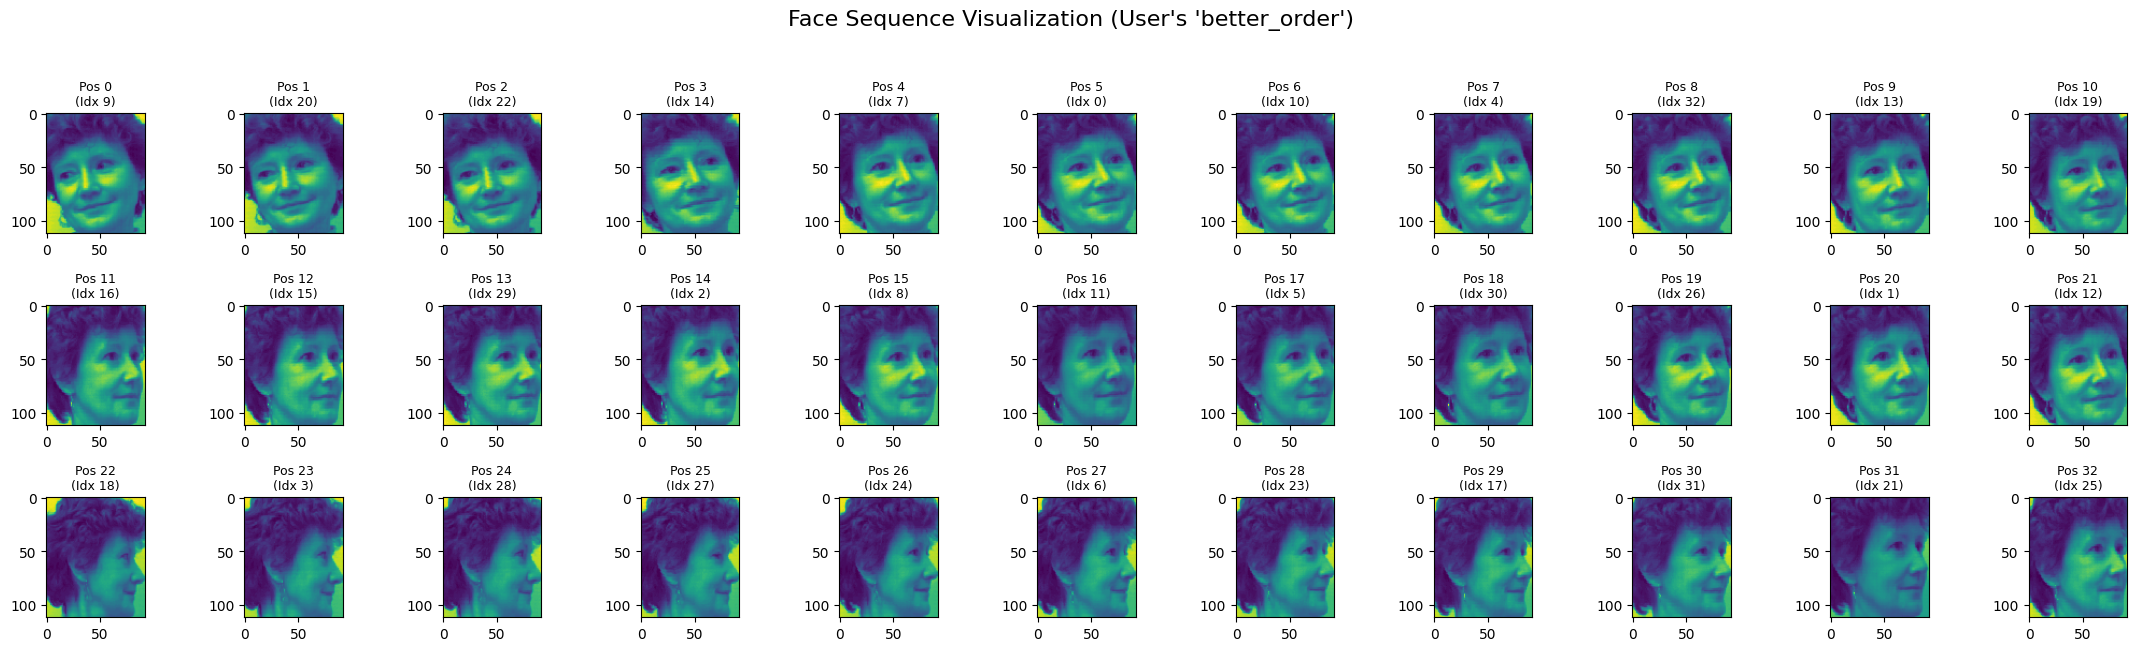

In [10]:
# Cell 7: Visualize Face Sequence based on User's "better_order" (Colormap + Axes)
import matplotlib.pyplot as plt
import numpy as np

# Ensure face_data is loaded and has the correct 3D shape
if 'face_data' in locals() and face_data is not None and face_data.ndim == 3 and face_data.shape[0] == 33:

    # The new order proposed by you (assuming 0-based indices)
    # Copied from your input
    better_order = np.array([
         9, 20, 22, 14,  7,  0, 10,   4, 32, 13, 19,   
        16, 15, 29,  2,  8, 11,  5,  30, 26,  1, 12,   
        18,  3, 28, 27, 24,  6, 23, 17, 31, 21, 25     
    ])


    # Validate the user's proposed order
    is_valid_order = False
    if len(better_order) == 33:
        unique_indices, counts = np.unique(better_order, return_counts=True)
        if len(unique_indices) == 33 and np.all(unique_indices >= 0) and np.all(unique_indices < 33):
            print("User's 'better_order' validated (33 unique indices from 0-32).")
            is_valid_order = True
        else:
             print("Validation failed: User's 'better_order' indices are not unique or out of range [0, 32]. Please double-check the list.")
             # Add more detailed validation failure reasons if needed
    else:
        print(f"Error: Expected 33 indices in user's 'better_order', but got {len(better_order)}. Please check your list.")


    # Proceed only if the order is valid
    if is_valid_order:
        print("Displaying images in the 'better_order' proposed by you (using colormap and axes)...")

        # Determine grid size
        n_rows = 3
        n_cols = 11
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2.2)) # Adjust figsize
        fig.suptitle("Face Sequence Visualization (User's 'better_order')", fontsize=16)

        # Flatten axes array
        axes_flat = axes.flatten()

        for i in range(len(better_order)):
            img_index = better_order[i] # Get the index from YOUR proposed 'better_order'
            img_matrix = face_data[img_index, :, :] # Get the image data

            ax = axes_flat[i]
            # Use imshow with transpose (.T) but without cmap='gray' to use default colormap
            # Keep axes visible by NOT calling ax.axis('off')
            im = ax.imshow(img_matrix.T)
            ax.set_title(f"Pos {i}\n(Idx {img_index})", fontsize=9) # Show position and original index

        # Hide any unused subplots
        for j in range(len(better_order), n_rows * n_cols):
            axes_flat[j].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

else:
    print("Error: face_data is not loaded correctly or not in the expected 3D shape (33, 92, 112). Please run previous cells first.")

User's 'latest_order' validated (33 unique indices from 0-32).
Displaying images in the 'latest_order' proposed by you (using colormap and axes)...


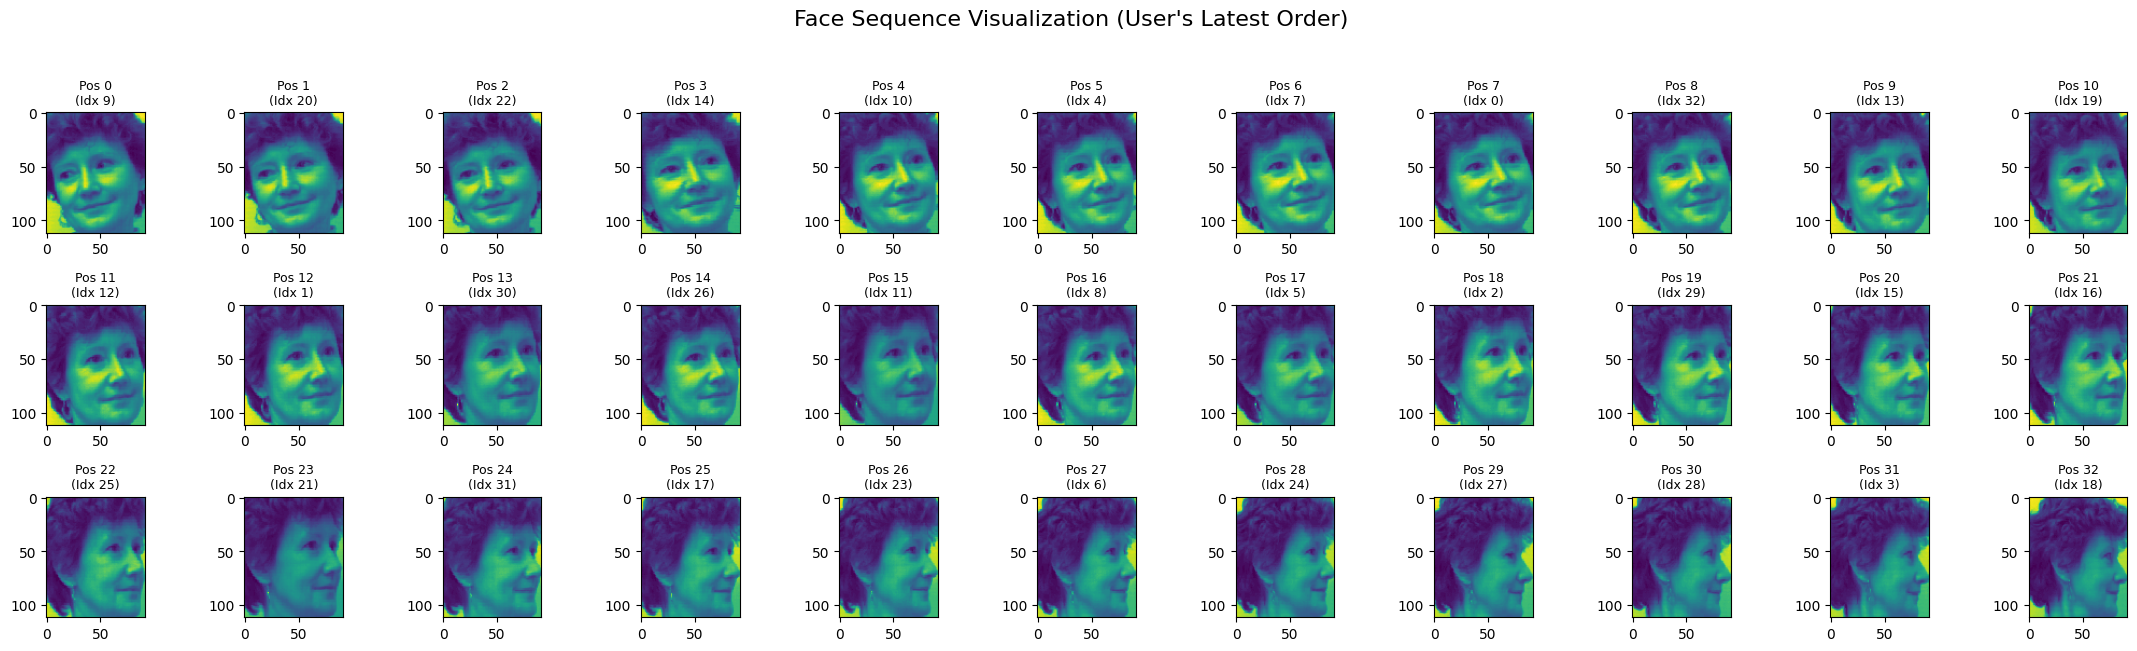

In [15]:
# Cell 8: Visualize Face Sequence based on User's "Latest_Order" (Colormap + Axes)
import matplotlib.pyplot as plt
import numpy as np

# Ensure face_data is loaded and has the correct 3D shape
if 'face_data' in locals() and face_data is not None and face_data.ndim == 3 and face_data.shape[0] == 33:

    # The latest order proposed by you (assuming 0-based indices)
    latest_order = np.array([
        9, 20, 22, 14, 10, 4, 7, 0, 32, 13, 19, 12, 1, 30, 26, 11, 8, 5,
        2, 29, 15, 16, 25, 21, 31, 17, 23, 6, 24, 27, 28, 3, 18
    ])

    # Validate the user's proposed order
    is_valid_order = False
    if len(latest_order) == 33:
        unique_indices, counts = np.unique(latest_order, return_counts=True)
        if len(unique_indices) == 33 and np.all(unique_indices >= 0) and np.all(unique_indices < 33):
            print("User's 'latest_order' validated (33 unique indices from 0-32).")
            is_valid_order = True
        else:
             print("Validation failed: User's 'latest_order' indices are not unique or out of range [0, 32]. Please double-check the list.")
             # Add more detailed validation failure reasons if needed
    else:
        print(f"Error: Expected 33 indices in user's 'latest_order', but got {len(latest_order)}. Please check your list.")


    # Proceed only if the order is valid
    if is_valid_order:
        print("Displaying images in the 'latest_order' proposed by you (using colormap and axes)...")

        # Determine grid size
        n_rows = 3
        n_cols = 11
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2.2)) # Adjust figsize
        fig.suptitle("Face Sequence Visualization (User's Latest Order)", fontsize=16)

        # Flatten axes array
        axes_flat = axes.flatten()

        for i in range(len(latest_order)):
            img_index = latest_order[i] # Get the index from YOUR proposed 'latest_order'
            img_matrix = face_data[img_index, :, :] # Get the image data

            ax = axes_flat[i]
            # Use imshow with transpose (.T) but without cmap='gray' to use default colormap
            # Keep axes visible by NOT calling ax.axis('off')
            im = ax.imshow(img_matrix.T)
            ax.set_title(f"Pos {i}\n(Idx {img_index})", fontsize=9) # Show position and original index

        # Hide any unused subplots
        for j in range(len(latest_order), n_rows * n_cols):
            axes_flat[j].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

else:
    print("Error: face_data is not loaded correctly or not in the expected 3D shape (33, 92, 112). Please run previous cells first.")